In [1]:
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
root_dir = '/data/globus/jbassham/thesis-rough'

In [11]:
def plot_map(
    data, lon, lat,
    cmap = cmo.cm.thermal, vmin = None, vmax = None,
    title = None, cbar_label = None):

    # Set longitude bounds for plot
    lon_min = -180
    lon_max = 180

    # Set latitude bounds based and projecttion based on hemisphere
    if HEM == 'sh':
        lat_min = -90
        lat_max = -65
        projection = ccrs.SouthPolarStereo()
    elif HEM == 'nh':
        lat_min = 65
        lat_max = 90
        projection = ccrs.NorthPolarStereo()

    # Define the data-to-plot's (regrid) coordinate reference system 
    crs = ccrs.PlateCarree()

    # Initialize subplot
    fig, ax = plt.subplots(
        figsize = (6, 6),
        subplot_kw = {'projection': projection},
    )

    # Set plot extent
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)

    # Include coatlines
    ax.coastlines()

    # Plot pcolormesh plot
    pcm = ax.pcolormesh(
        lon, lat, data,
        transform = crs,
        cmap = cmap, 
        vmin = vmin, vmax = vmax,
    )

    # Set title
    ax.set_title(title, fontsize = '14', fontweight = 'bold')

    # Add colorbar
    cbar = fig.colorbar(pcm, ax = ax, orientation='vertical')

    # Label colorbar
    if cbar_label is not None:
        cbar.set_label(cbar_label, fontsize = '14', fontweight = 'bold')


    plt.show()

    return

/tmp/ipykernel_3090751/787760811.py:21: RuntimeWarning: Mean of empty slice
  plot_map(np.nanmean(ri, axis = 0), lon, lat, title = 'Mean ri')


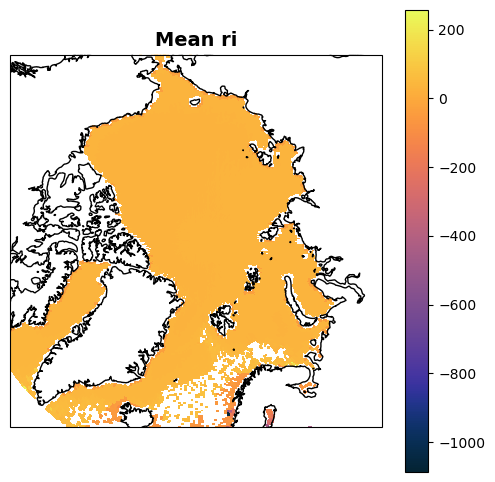

/tmp/ipykernel_3090751/787760811.py:23: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plot_map(np.nanvar(ri, axis = 0), lon, lat, title = 'Var ri')


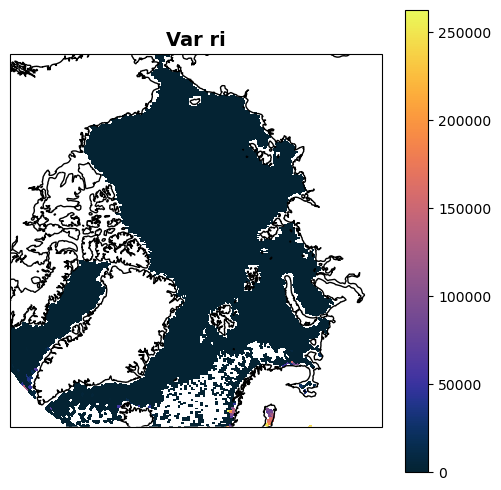

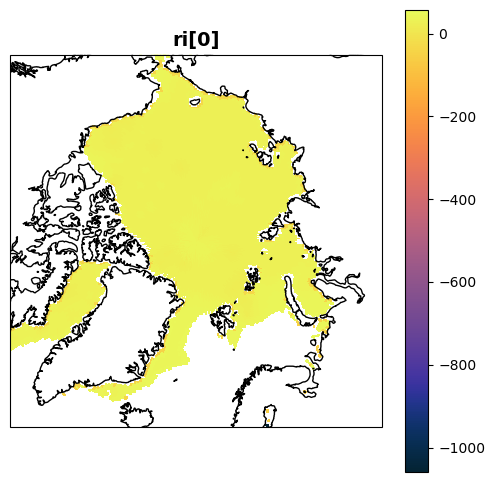

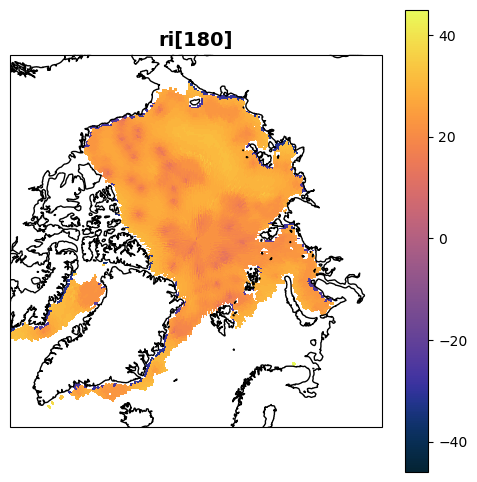

In [ ]:
# Import regrid data (without mask or normalizing)

HEM = 'nh'

fnam = f'regrid/{HEM}/01072026_1643/motion_ppv4_latlon_{HEM}19922020_01072026_1643.npz'

data = np.load(os.path.join(root_dir, fnam))

ri = data['r']

# Load coordinates
fnam = f'coordinates/{HEM}/01072026_1643/coord_{HEM}19922020_01072026_1643.npz'

data = np.load(os.path.join(root_dir, fnam))
lat = data['lat']
lon = data['lon']

# Load time 
time = data['time']

plot_map(np.nanmean(ri, axis = 0), lon, lat, title = 'Mean ri')

plot_map(np.nanvar(ri, axis = 0), lon, lat, title = 'Var ri')

plot_map(ri[0,:,:], lon, lat, title = 'ri[0]')

plot_map(ri[180,:,:], lon, lat, title = 'ri[180]')

neg_uncertainty = np.where(ri < 0, 1, 0)

day_count_neg_uncertainty = np.nansum(neg_uncertainty, axis = 0)

plot_map(day_count_neg_uncertainty, lon, lat, title = 'num days ri < 0')


/tmp/ipykernel_3090751/179798681.py:21: RuntimeWarning: Mean of empty slice
  plot_map(np.nanmean(ri, axis = 0), lon, lat, title = 'Mean ri')


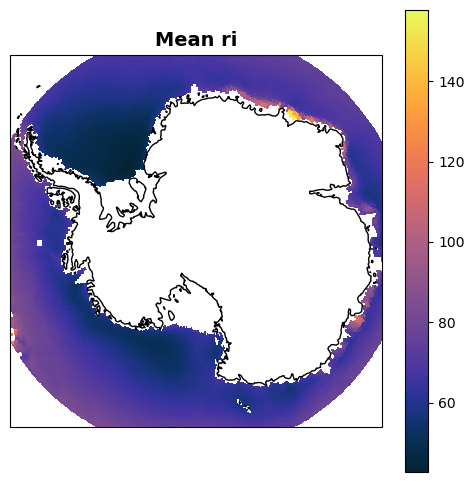

/tmp/ipykernel_3090751/179798681.py:23: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plot_map(np.nanvar(ri, axis = 0), lon, lat, title = 'Var ri')


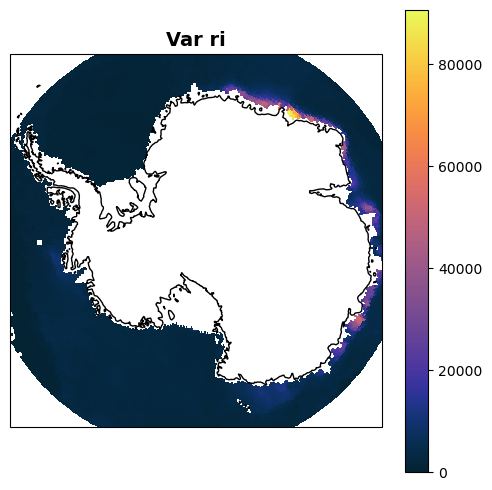

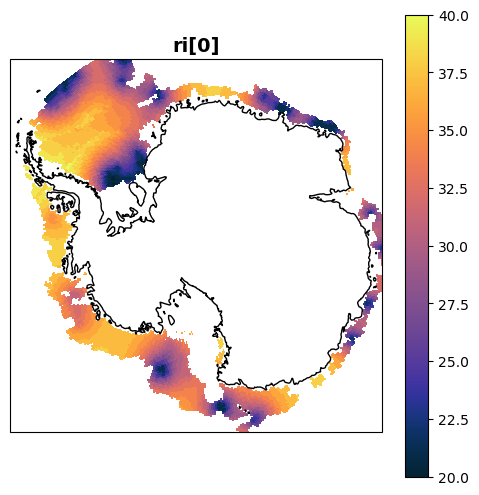

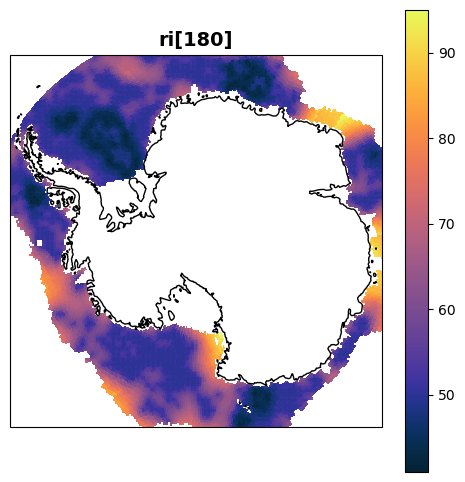

In [ ]:
# Import regrid data (without mask or normalizing)

HEM = 'sh'

fnam = f'regrid/{HEM}/01072026_1643/motion_ppv4_latlon_{HEM}19922020_01072026_1643.npz'

data = np.load(os.path.join(root_dir, fnam))

ri = data['r']

# Load coordinates
fnam = f'coordinates/{HEM}/01072026_1643/coord_{HEM}19922020_01072026_1643.npz'

data = np.load(os.path.join(root_dir, fnam))
lat = data['lat']
lon = data['lon']

# Load time 
time = data['time']

plot_map(np.nanmean(ri, axis = 0), lon, lat, title = 'Mean ri')

plot_map(np.nanvar(ri, axis = 0), lon, lat, title = 'Var ri')

plot_map(ri[0,:,:], lon, lat, title = 'ri[0]')

plot_map(ri[180,:,:], lon, lat, title = 'ri[180]')

neg_uncertainty = np.where(ri < 0, 1, 0)

day_count_neg_uncertainty = np.nansum(neg_uncertainty, axis = 0)

plot_map(day_count_neg_uncertainty, lon, lat, title = 'num days ri < 0')